In [1]:
import pandas as pd
from ggplot import *
import gmaps
import os

project_id = "the-d-team-164512"
gmaps.configure(api_key=os.environ['GMAP_API_THE_D_TEAM'])

In [12]:
query = """\
SELECT
pc.state
, pc.regional_name
, YEAR(DATE(t.prescription_week)) AS year
, COUNT(UNIQUE(s.store_id))
, SUM(t.patientprice_amt)
, SUM(t.patientprice_amt) / COUNT(UNIQUE(s.store_id)) AS amt_per_store
FROM dthon.stores_lookup s
LEFT JOIN dthon.postcodes pc
ON s.postcode = pc.postcode
LEFT JOIN dthon.transactions t
ON t.store_id = s.store_id
WHERE pc.state IS NOT NULL
AND pc.state IN ({0})
GROUP BY
pc.state
, pc.regional_category
, pc.regional_name
, year
ORDER BY
pc.state
, pc.regional_category
, year
"""

df_nsw = pd.read_gbq(query.format("'NSW'"), project_id)
df_nsw.head(3)

Waiting for job to complete...


,pc_state,pc_regional_name,year,f0_,f1_,amt_per_store
0,NSW,Metropolitan,NaN,6,NaN,NaN
1,NSW,Metropolitan,2008,1,83.96,83.960
2,NSW,Metropolitan,2009,30,14702.13,490.071


In [13]:
df_vic = pd.read_gbq(query.format("'VIC'"), project_id)
df_vic.head(3)

Waiting for job to complete...


,pc_state,pc_regional_name,year,f0_,f1_,amt_per_store
0,VIC,Metropolitan,2002,1,234.00,234.000
1,VIC,Metropolitan,2008,2,82.40,41.200
2,VIC,Metropolitan,2009,30,4695.36,156.512


In [14]:
df_rest = pd.read_gbq(query.format("'QLD', 'SA', 'TAS', 'WA', 'ACT', 'NT'"), project_id)
df_rest.head(3)

Waiting for job to complete...
Waiting for job to complete...
Waiting for job to complete...
Waiting for job to complete...
Waiting for job to complete...


,pc_state,pc_regional_name,year,f0_,f1_,amt_per_store
0,ACT,Metropolitan,2009,2,598.000000,299.000000
1,ACT,Metropolitan,2010,45,1028929.300000,22865.095556
2,ACT,Metropolitan,2011,47,3272114.019999,69619.447234


In [20]:
df_all = pd.concat([df_nsw, df_vic, df_rest])
# df_all.year = pd.Series(df_all.year).apply(pd.to_datetime, format='%Y')

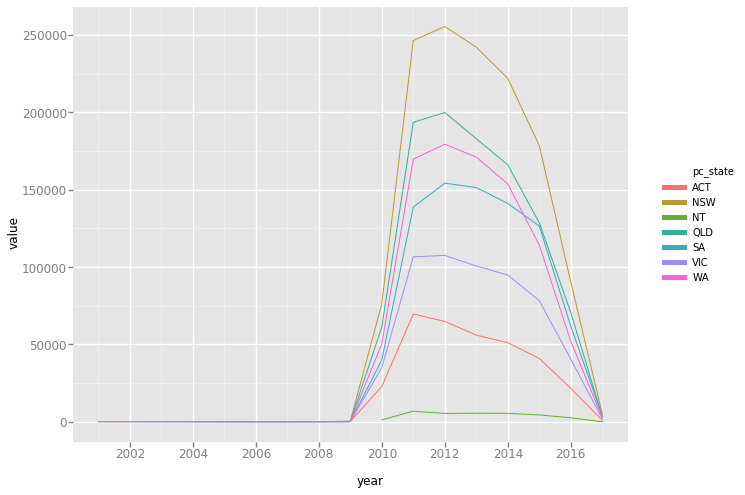

<ggplot: (287341902)>

In [45]:
df_all_lng = pd.melt(
    df_all[df_all['pc_regional_name'] == 'Metropolitan'],
    id_vars=['year', 'pc_state'],
    value_vars=['amt_per_store'])
ggplot(
    aes(x='year', y='value', colour='pc_state'),
    data=df_all_lng) +\
    geom_line()

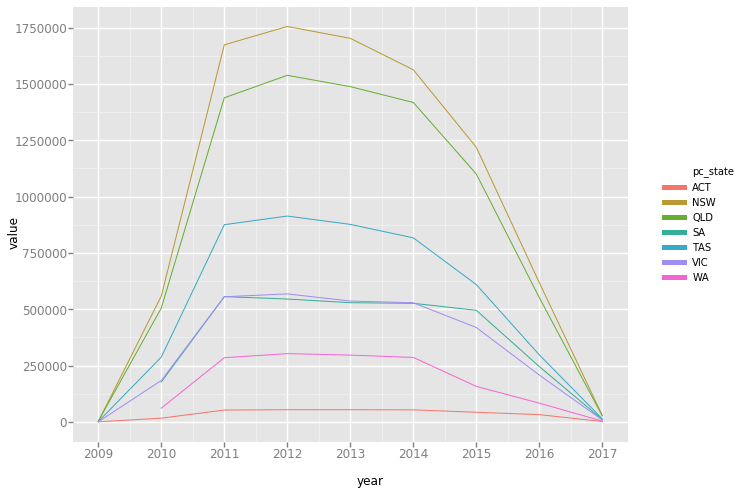

<ggplot: (290179732)>

In [64]:
df_all_lng = pd.melt(
    df_all[df_all['pc_regional_name'] == ' Inner Regional Australia'],
    id_vars=['year', 'pc_state'],
    value_vars=['amt_per_store'])
ggplot(
    aes(x='year', y='value', colour='pc_state'),
    data=df_all_lng) +\
    geom_line()

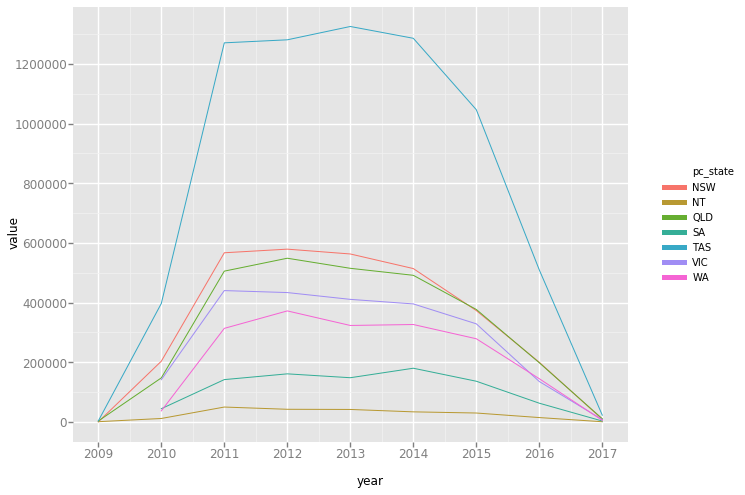

<ggplot: (290203656)>

In [65]:
df_all_lng = pd.melt(
    df_all[df_all['pc_regional_name'] == ' Outer Regional Australia'],
    id_vars=['year', 'pc_state'],
    value_vars=['amt_per_store'])
ggplot(
    aes(x='year', y='value', colour='pc_state'),
    data=df_all_lng) +\
    geom_line()

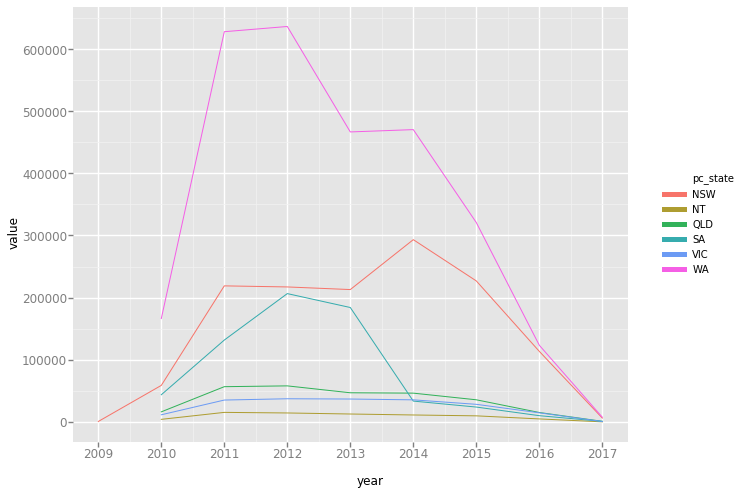

<ggplot: (-9223372036565390290)>

In [62]:
df_all_lng = pd.melt(
    df_all[df_all['pc_regional_name'] == ' Remote Australia'],
    id_vars=['year', 'pc_state'],
    value_vars=['amt_per_store'])
ggplot(
    aes(x='year', y='value', colour='pc_state'),
    data=df_all_lng) +\
    geom_line()

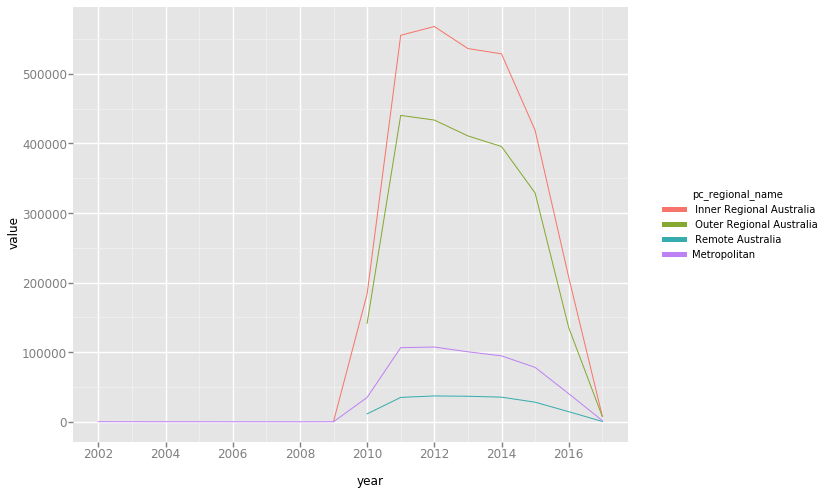

<ggplot: (291627833)>

In [79]:
df_all_lng = pd.melt(
    df_all[df_all['pc_state'] == 'VIC'],
    id_vars=['year', 'pc_regional_name'],
    value_vars=['amt_per_store'])
ggplot(
    aes(x='year', y='value', colour='pc_regional_name'),
    data=df_all_lng) +\
    geom_line()

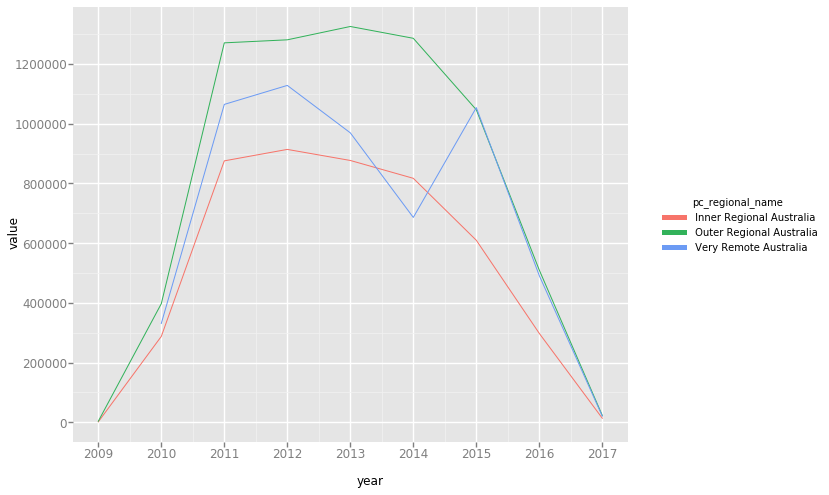

<ggplot: (-9223372036563147986)>

In [80]:
df_all_lng = pd.melt(
    df_all[df_all['pc_state'] == 'TAS'],
    id_vars=['year', 'pc_regional_name'],
    value_vars=['amt_per_store'])
ggplot(
    aes(x='year', y='value', colour='pc_regional_name'),
    data=df_all_lng) +\
    geom_line()